## Justification or answer summary needed for every question

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [ ]:
dataset

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset['salary'].fillna(0,inplace=True)

In [ ]:
dataset.isnull().sum()

## 1.Replace the NaN values with correct value. And justify why you have chosen the same.

In [ ]:
dataset.info()

In [ ]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [ ]:
quan,qual=quanQual(dataset)

In [ ]:
quan

In [ ]:
qual

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset[quan])
df=imp.transform(dataset[quan])
df = pd.DataFrame(df,columns = quan)

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
cate=dataset[qual]

In [ ]:
cate

In [ ]:
cate.isnull().sum()

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(dataset[qual])
cate=imp.transform(dataset[qual])
cate = pd.DataFrame(cate,columns = qual)

In [ ]:
cate.isnull().sum()

In [ ]:
two=[df,cate]

In [ ]:
preprocessed=pd.concat(two,axis=1)

In [ ]:
preprocessed

In [ ]:
preprocessed.isnull().sum()

In [ ]:
preprocessed.to_csv("Preplacementfulldata.csv",index=False)

In [ ]:
preprocessed

## Answer: Removed all the null values

## 2.How many of them are not placed?

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("Preplacementfulldata.csv")

In [ ]:
dataset['status'].value_counts()

#### Answer: 67 persons are not placed in this dataset

## 3.Find the reason for non placement from the dataset?

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("Preplacementfulldata.csv")

In [ ]:
dataset

In [ ]:
dataset.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status']
for i in col:
    dataset[i] = le.fit_transform(dataset[i]).astype(int)

In [ ]:
dataset

In [ ]:
dataset.corr()

## Answer:
## 1.The student got average percentage in degree_t and mba_p 
## This is the main reason for student 'Not placed'
## 2. majority of students are in MBA-HR Department


## 4.What kind of relation between salary and mba_p

In [ ]:
dataset[quan].corr()

## The relation between salary and mba_p is 0.152222. 
## This is the positive correlation
## This is very poor freedom of values

## 5.Which specialization is getting minimum salary?¶

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv('Placement_Data_Full_Class.csv')

In [ ]:
dataset

In [ ]:
dataset['salary'].min()

In [ ]:
df=dataset.groupby(['specialisation','salary']).min()

In [ ]:
df

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
sb.violinplot(x = "specialisation", y = "salary", data = dataset,hue="specialisation")
plt.show()

## Answer:
## Marketing Finance department got minimum salary

## 6.How many of them getting above 500000 salary?

In [ ]:
dataset[dataset['salary'] > 500000].value_counts()

In [ ]:
dataset[dataset['salary'] > 500000].value_counts().sum()

## 3. persons got above 500000 salary

## 7.Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("Preplacementfulldata.csv")

In [ ]:
dataset

In [ ]:
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])


## Null Hypothesis. H0 - There is a no significant difference between etest_p and mba_p(pvalue<0.05)
## Alternate Hypothesis. H1 - There is a significant difference between etest_p and mba_p

## Answer: This pvalue is greater than 0.05 so reject null hypothesis and accept alternate hypothesis
## There is a significant difference between etest_p and mba_p

## 8.Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Makedecision using Hypothesis Testing)

In [ ]:
dataset=pd.read_csv("Preplacementfulldata.csv")
dataset

In [ ]:
from scipy.stats import ttest_ind
#dataset=dataset.dropna()
degree_t = dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree_t, specialisation)

In [ ]:
# pvalue<0.05
# This pvalue is less than 0.05 this is true so reject null Hypothesis and accept alternate Hypothesis
#Answer: There is a significant difference between degree_t and specialisation

## 9.Convert the normal distribution to standard normal distribution for salary column

In [ ]:
dataset

In [ ]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


In [ ]:
stdNBgraph(dataset["salary"])

## 10.What is the probability Density Function of the salary range from 700000 to 900000?¶

In [ ]:
dataset

In [ ]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

In [ ]:
get_pdf_probability(dataset["salary"],700000,900000)

## 11.Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)¶

In [ ]:
dataset

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

sci_tech_data = dataset[dataset['degree_t'] == 'Sci&Tech']

# Perform two-way ANOVA for etest_p
model = ols('etest_p ~ mba_p', data=sci_tech_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print("ANOVA table for etest_p:")
print(anova_table)

# Perform two-way ANOVA for mba_p
model = ols('mba_p ~ etest_p', data=sci_tech_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table for mba_p
print("\nANOVA table for mba_p:")
print(anova_table)


## Null Hypothesis. H0 - There is a no significant difference between etest_p and mba_p(pvalue<0.05)
## Alternate Hypothesis. H1 - There is a significant difference between etest_p and mba_p
## This pvalue is greater than 0.05 so reject null hypothesis and accept alternate hypothesis
## There is a significant difference between etest_p and mba_p

## 12.Which parameter is highly correlated with salary?

In [19]:
import pandas as pd
import numpy as np

In [20]:
dataset=pd.read_csv("Preplacementfulldata.csv")

In [21]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [27]:
dataset.corr()

ValueError: could not convert string to float: 'M'

In [23]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [24]:
quan,qual=quanQual(dataset)

In [25]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [26]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002524
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.534030
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.449155
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.405290
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.185577
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.138768
salary,0.002524,0.534030,0.449155,0.405290,0.185577,0.138768,1.000000


## ssc_p is highly correlated with salary

## 13. plot any useful graph and explain it.¶

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

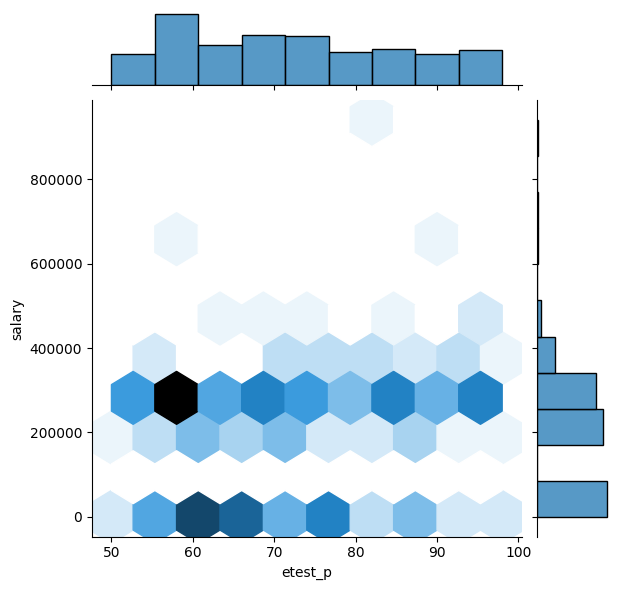

In [30]:
sb.jointplot(x = 'etest_p',y = 'salary',data = dataset,kind='hex')
plt.show()


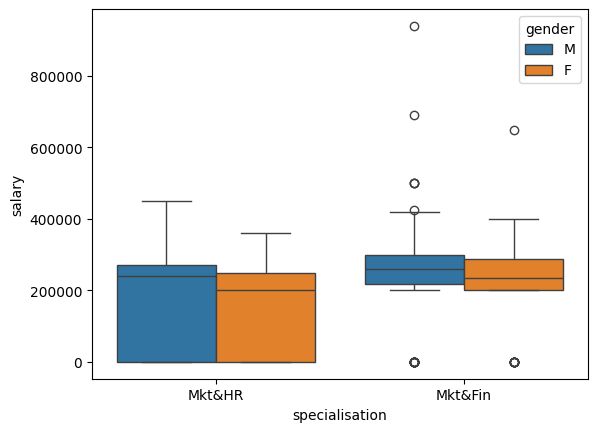

In [31]:
sb.boxplot(x = "specialisation", y = "salary", data = dataset,hue="gender" )
plt.show()